In [1]:
import os
import re
import csv
import pandas as pd
from operator import itemgetter
import math
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataframe = pd.read_excel("JournalHomeGrid.xlsx")

In [3]:
dataframe['Full Journal Title'] = dataframe['Full Journal Title'].apply(lambda x: str(x).upper())

In [4]:
dataframe.head()

,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score
0,1,CA-A CANCER JOURNAL FOR CLINICIANS,28839.0,244.585,0.066
1,2,NEW ENGLAND JOURNAL OF MEDICINE,332831.0,79.26,0.702
2,3,LANCET,233269.0,53.254,0.436
3,4,CHEMICAL REVIEWS,174920.0,52.613,0.265
4,5,NATURE REVIEWS MATERIALS,3218.0,51.941,0.015


In [5]:
def openfile(path):
    with open(path, 'rb') as df:
        contents = df.read()
    text = contents.decode()
    all_articles=text.split("\n\n")
    #print(("len of article: ",len(all_articles)))
    return all_articles

In [6]:
def get_key_abs(all_articles):
    all_keywords = []
    all_journals = []
    for art in all_articles:
        if ("SO " in art) and ("ID " in art):
                sentences = art.split("\n")
                for item in sentences:
                    if "ID " in item:
                        all_keywords.append(item)
                    elif "SO " in item:
                        all_journals.append(item)
    return all_keywords, all_journals  
        

In [14]:
df1 =pd.DataFrame(columns=['Journal Name',])
df2 =pd.DataFrame(columns=['Keywords'])
for i in range(1,41):
#     path="biomaterial/savedrecs%d.txt"%i
    path="/Users/Jingsi/Desktop/A_Wiley/data_new/biomaterial_data/savedrecs%d.txt"%i
    all_articles=openfile(path)
    all_keywords, all_journals =get_key_abs(all_articles)
    df_1 = pd.DataFrame({'Journal Name' : all_journals})
    df1 =df1.append(df_1)
    df_2 = pd.DataFrame({'Keywords':all_keywords})
    df2 =df2.append(df_2)

In [15]:
df2['Keywords'] = df2['Keywords'].apply(lambda x : x.split())
df2['zero'] = df2['Keywords'].apply(lambda x : x[0])
df2 = df2[df2['zero'] == 'ID']
df2['Keywords'] = df2['Keywords'].apply(lambda x : x[1:])
df2 = df2.drop('zero', axis = 1)
df2['Keywords'] = df2['Keywords'].apply(lambda x: ' '.join(x))

In [16]:
df1['Journal Name'] = df1['Journal Name'].apply(lambda x : x.split())
df1['zero'] = df1['Journal Name'].apply(lambda x : x[0])
df1 = df1[df1['zero'] == 'SO']
df1['Journal Name'] = df1['Journal Name'].apply(lambda x : x[1:])
df1 = df1.drop('zero', axis = 1)
df1['Journal Name'] = df1['Journal Name'].apply(lambda x: ' '.join(x))

In [17]:
df2 = df2[:18152]

In [18]:
journal_list = list(df1.values.flatten())
keyword_list = list(df2.values.flatten())

In [19]:
frame = pd.DataFrame({'Journal Name' : journal_list, 'Keywords' :keyword_list })

ValueError: arrays must all be same length

In [14]:
frame['Keywords'] = frame['Keywords'].apply(lambda x : x.split(';'))

In [15]:
def parsing(x):
    lst = []
    for words in x:
        words = words.strip()
        lst.extend(words.split())
    return lst

In [16]:
frame['Keywords'] = frame['Keywords'].apply(lambda x : parsing(x))

In [17]:
frame

,Journal Name,Keywords
0,MATERIALS LETTERS,"[THERMAL-DEGRADATION, BORIC-ACID, CHITOSAN]"
1,CARBOHYDRATE POLYMERS,"[GROWTH-FACTOR, DELIVERY, SYNTHETIC, EXTRACELL..."
2,MATERIALS & DESIGN,"[POROUS, CHITOSAN, SCAFFOLDS, DOUBLE-NETWORK, ..."
3,MATERIALS & DESIGN,"[DOPED, BIOACTIVE, GLASSES, MODULATED, SILICON..."
4,MATERIALS RESEARCH EXPRESS,"[POLYESTER-BASED, NANOPARTICLES, DYNAMIC, LIGH..."
5,MATERIALS RESEARCH EXPRESS,"[BIOMEDICAL, APPLICATIONS, IN-VITRO, MECHANICA..."
6,MATERIALS LETTERS,"[EXTRACELLULAR-MATRIX, HEMORRHAGE, SWINE, MODEL]"
7,NANOTECHNOLOGY,"[ENHANCED, RAMAN-SCATTERING, SINGLE-MOLECULE, ..."
8,APPLIED SURFACE SCIENCE,"[PLASTIC-DEFORMATION, CELL, RESPONSE, EROSION,..."
9,MATERIALS & DESIGN,"[FE-PD, MATRIX, ADHESION, SURFACES, TISSUE, FI..."


In [18]:
#res = res['Journal Name'].value_counts().reset_index()
#res.columns = ['Journal Name', 'count']

In [19]:
result = dataframe.merge(frame, how='inner', left_on='Full Journal Title', right_on='Journal Name')

In [20]:
result['Keywords'][4]

['BIOMEDICAL', 'APPLICATIONS', 'STENTS']

In [21]:
topics = {'Topic 0':
['tissue', 'engineering', 'silk', 'cells', 'biomaterial', 'scaffolds', 'regeneration', 'cell', 'scaffold', 'biomaterials'],

'Topic 1':
['surface', 'adsorption', 'protein', 'surfaces', 'blood', 'poly', 'polymer', 'contact', 'groups', 'platelet'],

'Topic 2':
['bone', 'biomaterial', 'group', 'study', 'defects', 'tissue', 'implant', 'weeks', 'formation', 'defect'],

'Topic 3':
['films', 'film', 'plasma', 'layer', 'pva', 'surface', 'deposition', 'substrate', 'silicon', 'properties'],

'Topic 4':
['microscopy', 'laser', 'spectroscopy', 'imaging', 'optical', 'electron', 'ray', 'light', 'using', 'scanning'],

'Topic 5':
['model', 'material', 'analysis', 'data', 'biomedical', 'results', 'using', 'based', 'models', 'used'],

'Topic 6':
['surface', 'adhesion', 'surfaces', 'coating', 'titanium', 'bacterial', 'biofilm', 'biomaterial', 'implant', 'coatings'],

'Topic 7':
['materials', 'applications', 'biomedical', 'review', 'based', 'properties', 'devices', 'recent', 'research', 'development'],

'Topic 8':
['cell', 'cells', 'scaffolds', 'scaffold', 'tissue', 'proliferation', 'bone', 'engineering', 'culture', 'differentiation'],

'Topic 9':
['nanoparticles', 'magnetic', 'particles', 'size', 'fe', 'silica', 'nm', 'nps', 'particle', 'iron'],

'Topic 10':
['implants', 'wear', 'implant', 'coatings', 'materials', 'titanium', 'surface', 'properties', 'metal', 'coating'],

'Topic 11':
['ha', 'hydroxyapatite', 'calcium', 'phosphate', 'bone', 'hap', 'composite', 'ca', 'ray', 'tio'],

'Topic 12':
['materials', 'applications', 'biomedical', 'protein', 'self', 'acid', 'based', 'organic', 'assembly', 'molecular'],

'Topic 13':
['drug', 'delivery', 'release', 'controlled', 'systems', 'drugs', 'loaded', 'gene', 'therapeutic', 'based'],

'Topic 14':
['mechanical', 'properties', 'porous', 'shape', 'strength', 'memory', 'porosity', 'modulus', 'material', 'pore'],

'Topic 15':
['hydrogels', 'hydrogel', 'cross', 'properties', 'peg', 'gel', 'poly', 'swelling', 'gelatin', 'acid'],

'Topic 16':
['graphene', 'carbon', 'cancer', 'nanotubes', 'biomedical', 'human', 'toxicity', 'health', 'cells', 'oxide'],

'Topic 17':
['poly', 'properties', 'polymer', 'mechanical', 'acid', 'chitosan', 'degradation', 'thermal', 'materials', 'polymers'],

'Topic 18':
['ti', 'alloy', 'corrosion', 'alloys', 'mg', 'al', 'nb', 'titanium', 'resistance', 'zr'],

'Topic 19':
['cell', 'cells', 'biomaterial', 'expression', 'response', 'adhesion', 'inflammatory', 'biomaterials', 'stem', 'factor'],

'Topic 20':
['dna', 'concentration', 'ph', 'mu', 'mg', 'ml', 'high', 'water', 'time', 'detection'],

'Topic 21':
['chitosan', 'antibacterial', 'activity', 'wound', 'silver', 'antimicrobial', 'membranes', 'ag', 'membrane', 'cs'],

'Topic 22':
['temperature', 'phase', 'cr', 'high', 'beta', 'alloy', 'degrees', 'fatigue', 'process', 'strength'],

'Topic 23':
['collagen', 'matrix', 'tissue', 'plga', 'ecm', 'type', 'extracellular', 'skin', 'biomaterial', 'human']}

In [22]:
def topic(my_dict, keywords):
    topic = []
    my_dict = [x.upper() for x in my_dict]
    for lst in my_dict:
        if lst in keywords:
            topic.append(lst)
    return topic

In [23]:
topic(topics['Topic 5'],result['Keywords'][4])

['BIOMEDICAL']

In [24]:
result['topic0'] = result['Keywords'].apply(lambda x : topic(topics['Topic 0'],x))

In [25]:
result['topic1'] = result['Keywords'].apply(lambda x : topic(topics['Topic 1'],x))

In [26]:
result['topic2'] = result['Keywords'].apply(lambda x : topic(topics['Topic 2'],x))

In [27]:
result['topic3'] = result['Keywords'].apply(lambda x : topic(topics['Topic 3'],x))

In [28]:
result['topic4'] = result['Keywords'].apply(lambda x : topic(topics['Topic 4'],x))

In [29]:
result['topic5'] = result['Keywords'].apply(lambda x : topic(topics['Topic 5'],x))

In [30]:
result['topic6'] = result['Keywords'].apply(lambda x : topic(topics['Topic 6'],x))

In [31]:
result['topic7'] = result['Keywords'].apply(lambda x : topic(topics['Topic 7'],x))

In [32]:
result['topic8'] = result['Keywords'].apply(lambda x : topic(topics['Topic 8'],x))

In [33]:
result['topic9'] = result['Keywords'].apply(lambda x : topic(topics['Topic 9'],x))

In [34]:
result['topic10'] = result['Keywords'].apply(lambda x : topic(topics['Topic 10'],x))

In [35]:
result['topic11'] = result['Keywords'].apply(lambda x : topic(topics['Topic 11'],x))

In [36]:
result['topic12'] = result['Keywords'].apply(lambda x : topic(topics['Topic 12'],x))

In [37]:
result['topic13'] = result['Keywords'].apply(lambda x : topic(topics['Topic 13'],x))

In [38]:
result['topic14'] = result['Keywords'].apply(lambda x : topic(topics['Topic 14'],x))

In [39]:
result['topic15'] = result['Keywords'].apply(lambda x : topic(topics['Topic 15'],x))

In [40]:
result['topic16'] = result['Keywords'].apply(lambda x : topic(topics['Topic 16'],x))

In [41]:
result['topic17'] = result['Keywords'].apply(lambda x : topic(topics['Topic 17'],x))

In [42]:
result['topic18'] = result['Keywords'].apply(lambda x : topic(topics['Topic 18'],x))

In [43]:
result['topic19'] = result['Keywords'].apply(lambda x : topic(topics['Topic 19'],x))

In [44]:
result['topic20'] = result['Keywords'].apply(lambda x : topic(topics['Topic 20'],x))

In [45]:
result['topic21'] = result['Keywords'].apply(lambda x : topic(topics['Topic 21'],x))

In [46]:
result['topic22'] = result['Keywords'].apply(lambda x : topic(topics['Topic 22'],x))

In [47]:
result['topic23'] = result['Keywords'].apply(lambda x : topic(topics['Topic 23'],x))

In [48]:
result

,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score,Journal Name,Keywords,topic0,topic1,topic2,...,topic14,topic15,topic16,topic17,topic18,topic19,topic20,topic21,topic22,topic23
0,3,LANCET,233269.0,53.254,0.436,LANCET,"[TRANSFER, RADICAL, POLYMERIZATION, SELF-ASSEM...",[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,3,LANCET,233269.0,53.254,0.436,LANCET,"[PERIODONTAL, REPAIR, ATTACHMENT, FORMATION, D...",[],[],"[BONE, FORMATION]",...,[],[],[],[],[],[],[],[MEMBRANES],[],[]
2,3,LANCET,233269.0,53.254,0.436,LANCET,"[UV-IRRADIATION, AFFINITY, COMPLEX, SEPARATION...",[],[ADSORPTION],[],...,[],[],[],[],[],[],[],[],[],[]
3,4,CHEMICAL REVIEWS,174920.0,52.613,0.265,CHEMICAL REVIEWS,"[ATOMIC-FORCE, POLYMER, NANOCOMPOSITES, BYSSAL...",[],[POLYMER],[],...,[],[],[],[POLYMER],[],[],[],[],[],[]
4,4,CHEMICAL REVIEWS,174920.0,52.613,0.265,CHEMICAL REVIEWS,"[BIOMEDICAL, APPLICATIONS, STENTS]",[],[],[],...,[],[],[BIOMEDICAL],[],[],[],[],[],[],[]
5,4,CHEMICAL REVIEWS,174920.0,52.613,0.265,CHEMICAL REVIEWS,"[BONE, IMPLANTS, CERAMICS, ELECTRON]",[],[],[BONE],...,[],[],[],[],[],[],[],[],[],[]
6,4,CHEMICAL REVIEWS,174920.0,52.613,0.265,CHEMICAL REVIEWS,"[BONE, MORPHOGENETIC, PROTEIN, OSTEOGENIC, PRO...",[],[PROTEIN],[BONE],...,[],[],[],[],[],[],[],[],[BETA],[]
7,5,NATURE REVIEWS MATERIALS,3218.0,51.941,0.015,NATURE REVIEWS MATERIALS,"[SELF-LIGATING, BRACKETS, IN-VITRO, EVALUATION...",[],[],[],...,[],[],[],[],[RESISTANCE],[],[],[],[],[]
8,5,NATURE REVIEWS MATERIALS,3218.0,51.941,0.015,NATURE REVIEWS MATERIALS,"[SMALL-INTESTINAL, SUBMUCOSA, URINARY-BLADDER,...",[],[],[],...,[],[],[],[],[],[],[],[],[],[MATRIX]
9,5,NATURE REVIEWS MATERIALS,3218.0,51.941,0.015,NATURE REVIEWS MATERIALS,"[IN-WATER, EMULSIONS, CONTROLLING, LIPID, OXID...",[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [49]:
# Journal under Topic 0
df_topic0 = result[result.astype(str)['topic0'] != '[]']

In [50]:
df_topic0 = df_topic0[df_topic0['Journal Impact Factor'].apply(lambda x: isinstance(x, float))]

In [51]:
topic0_total = df_topic0['Journal Impact Factor'].sum()

In [52]:
topic0_total

15455.460000000005

In [71]:
d = {}
for i in range(0,24):
    d["topic%d"%i] = result[result.astype(str)['topic%d'%i] != '[]']
    d["topic%d"%i] = d["topic%d"%i][d["topic%d"%i]['Journal Impact Factor'].apply(lambda x: isinstance(x, float))]
    d["topic%d"%i] = d["topic%d"%i]['Journal Impact Factor'].sum()
print(d)

{'topic0': 15455.460000000005, 'topic1': 7233.41099999994, 'topic2': 10759.373, 'topic3': 5277.786999999978, 'topic4': 2009.6490000000026, 'topic5': 3353.5790000000015, 'topic6': 9043.13999999995, 'topic7': 4274.43, 'topic8': 15047.29899999998, 'topic9': 2736.6410000000046, 'topic10': 6651.117999999927, 'topic11': 7645.835999999931, 'topic12': 6186.573999999939, 'topic13': 2643.156999999998, 'topic14': 2427.6870000000004, 'topic15': 3959.377000000004, 'topic16': 8664.711999999941, 'topic17': 6086.575999999949, 'topic18': 3202.817000000008, 'topic19': 11033.333999999999, 'topic20': 933.6939999999992, 'topic21': 3313.9980000000073, 'topic22': 1529.0250000000035, 'topic23': 10268.105999999987}


In [88]:
JCR_total_dict = pd.DataFrame.from_dict(d ,orient='index')

In [89]:
JCR_total_dict.reset_index()

,index,0
0,topic0,15455.460
1,topic1,7233.411
2,topic2,10759.373
3,topic3,5277.787
4,topic4,2009.649
5,topic5,3353.579
6,topic6,9043.140
7,topic7,4274.430
8,topic8,15047.299
9,topic9,2736.641


In [90]:
JCR_total_dict.columns = ['Total_JCR']

In [93]:
from matplotlib.pyplot import figure

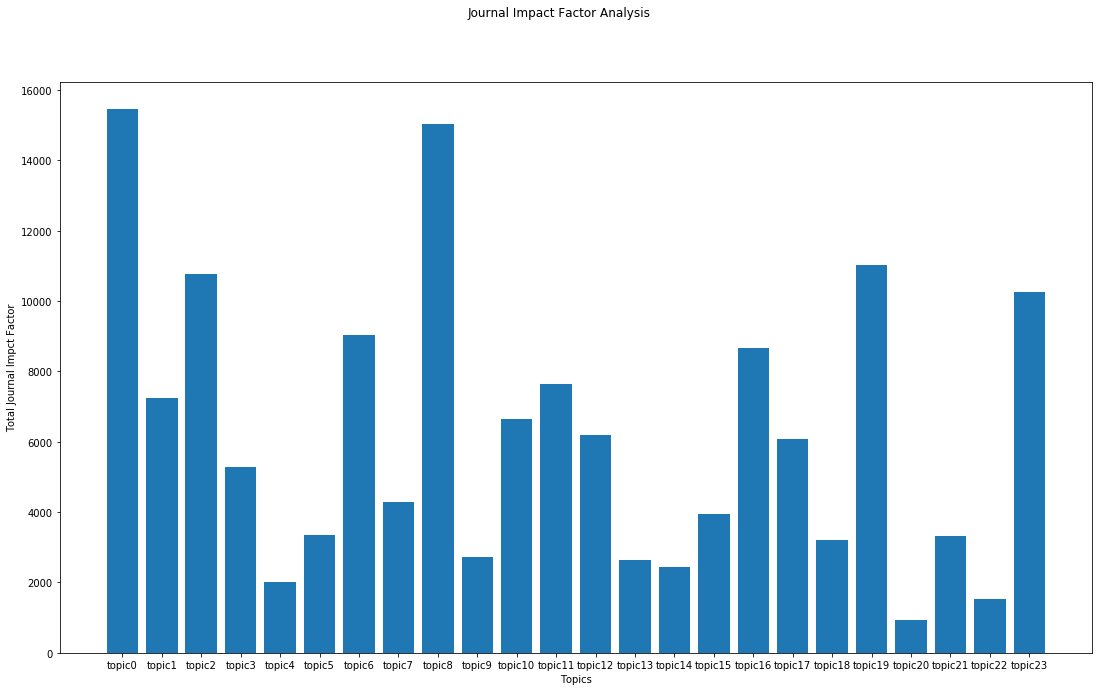

In [103]:
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
fig = plt.gcf()
fig.suptitle('Journal Impact Factor Analysis')
plt.xlabel('Topics')
plt.ylabel('Total Journal Impct Factor')
fig.set_size_inches(18.5, 10.5)
fig.savefig('Factor_Analysis.png', dpi=100)

plt.show()